In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load the image "testimage.jpg"
img_color = cv.imread("../data/testimage.JPG", cv.IMREAD_COLOR)

if img_color is None:
    print("Could not read the image")
else:
    print(f"img_color.shape: {img_color.shape}")
    print(f"img_clor.dtype: {img_color.dtype}")
    print(f"img_color.min(): {img_color.min()}")
    print(f"img_color.max(): {img_color.max()}\n")

img_color.shape: (561, 997, 3)
img_clor.dtype: uint8
img_color.min(): 0
img_color.max(): 255



In [3]:
img_gray = cv.imread("../data/testimage.JPG", cv.IMREAD_GRAYSCALE)
if img_gray is None:
    print("Could not read the image.")
else:
    print(f"img_gray.shape: {img_gray.shape}")
print(f"Top left pixel's intensity (gray level) value: img_gray[0,0] => {img_gray[0,0]}")

img_gray.shape: (561, 997)
Top left pixel's intensity (gray level) value: img_gray[0,0] => 55


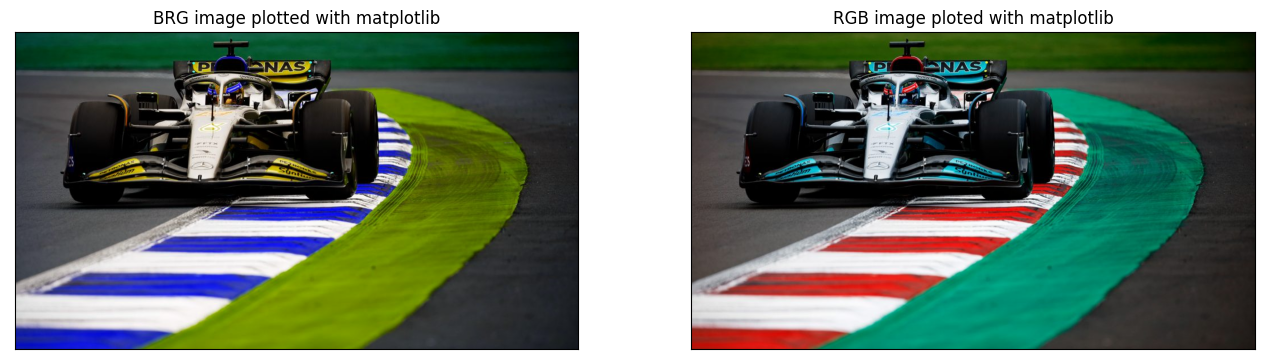

In [4]:
fig = plt.figure(figsize=(16,16))

plt.subplot(1,2,1); plt.imshow(img_color);
plt.title('BRG image plotted with matplotlib')
plt.xticks([]); plt.yticks([]); #to hide tick values on X and Y axis

#Now let reverse the color channels from (b,g,r) to (r,g,b) and plot the image with matplotlib 
img_color_reversed = img_color[:,:,::-1]
plt.subplot(1,2,2); plt.imshow(img_color_reversed);
plt.title('RGB image ploted with matplotlib')
plt.xticks([]); plt.yticks([]);

In [105]:
#Save the color- and gray scale images to the file system
cv.imwrite("../data/F1_color.png", img_color)
cv.imwrite("../data/F1_gray.png", img_gray)

True

Shape of the ROI: (280, 598)


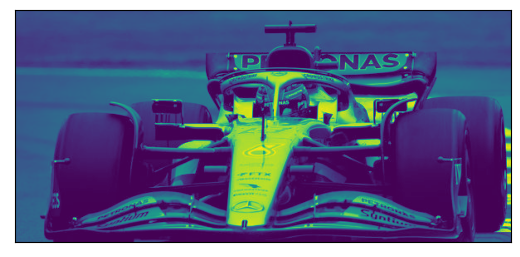

In [108]:
#I want to extract feature of F1 car, so I create a ROI containing F1 car
rows, cols = img_gray.shape
rows_ROI = round(rows/2)
cols_ROI = round(cols/2)
ROI = img_gray[0:rows_ROI, 50:cols_ROI+150]
plt.imshow(ROI), plt.xticks([]), plt.yticks([])
print(f"Shape of the ROI: {ROI.shape}")

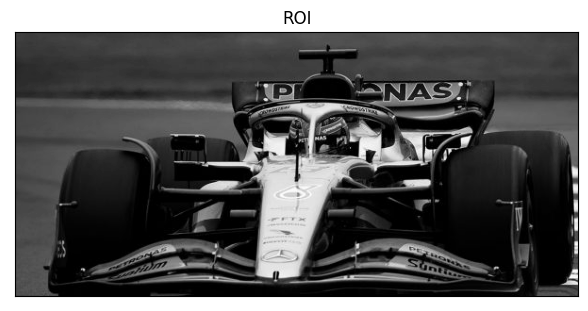

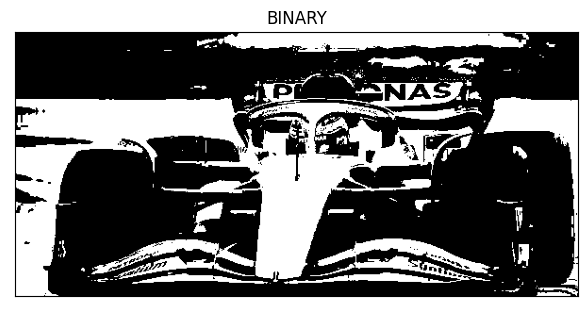

In [82]:
#Using ROI 
#thresholding the ROI with T = 50 and maxxval = 255
#using the various simple thresholding types
ret, thresh1 = cv.threshold(ROI, 70,255, cv.THRESH_BINARY)

#Plot the original image together with the various thresholded images
titles = ['ROI', 'BINARY']
images = [ROI, thresh1]

for i in range(2):
    plt.figure(figsize =(16,16)); plt.subplot(1,2,i+1), plt.imshow(images[i], cmap='gray', vmin = 0, vmax = 255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

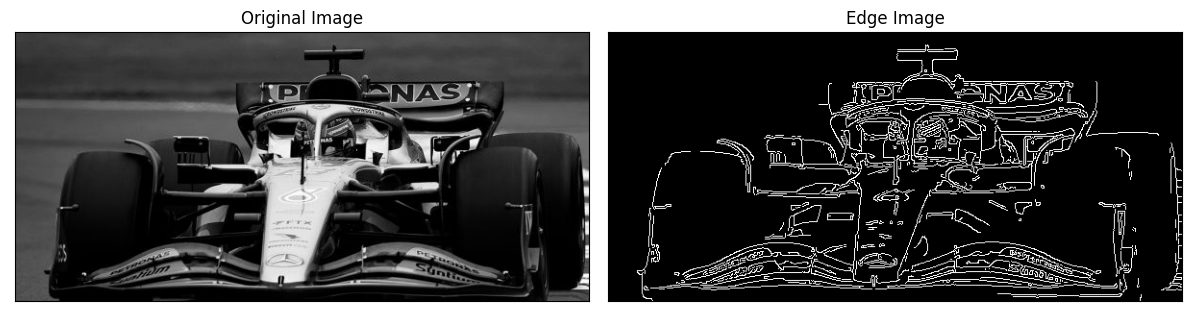

In [85]:
# Apply Canny edge detection
# with thresholds low=120, high=250
edges = cv.Canny(ROI, 120, 250)

# Plot the original image and the image with detected edges
plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(ROI,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

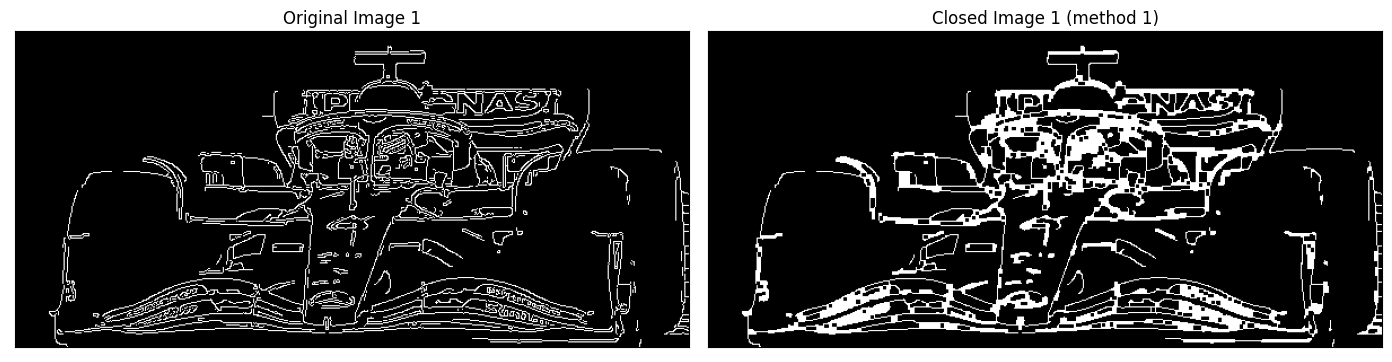

In [88]:
# Create a 3x3 kernel of ones.
kernel_3x3 = np.ones((3,3), np.uint8)

# "Close" the image, i.e., dilate then erode.

img1_dilated = cv.dilate(edges, kernel_3x3, iterations = 1)
img1_closed = cv.erode(img1_dilated, kernel_3x3, iterations = 1)


# Plot the original image and the closed images
plt.figure(figsize=(14,8))

plt.subplot(121), plt.imshow(edges, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img1_closed, cmap="gray")
plt.title('Closed Image 1 (method 1)'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

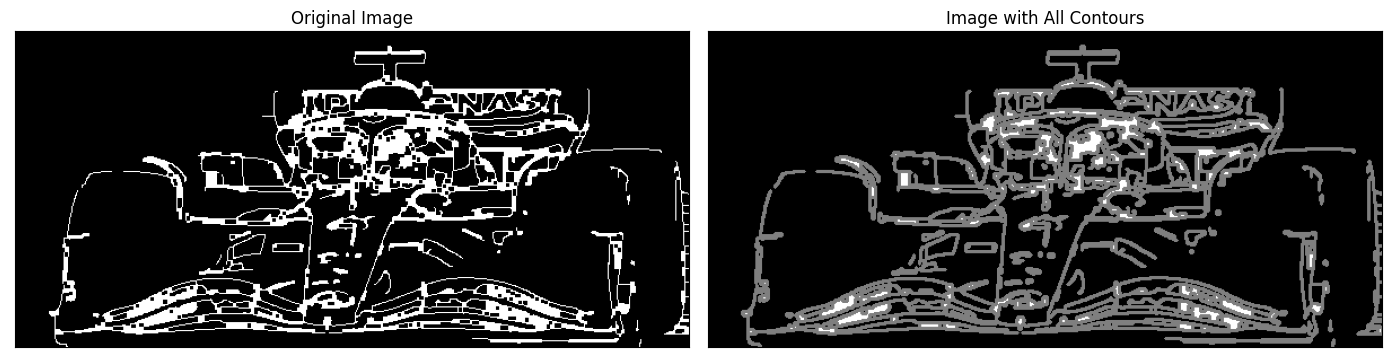

True

In [91]:
# Find all the contours in the binary image
contours, hierarchy = cv.findContours(img1_closed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw all the contours
# (in gray with a line thickness of 1):
img_all_contours =  img1_closed.copy()
cv.drawContours(img_all_contours, contours, -1, (127,127,127), 2) # -1 means draw all the contours, thickness 2

 #Plot the original image and the image with the drawn contours
plt.figure(figsize=(14,8))

plt.subplot(121), plt.imshow(img1_closed, cmap="gray"),
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_all_contours, cmap="gray"),
plt.title('Image with All Contours'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

cv.imwrite("../data/template_image.png", img1_closed)
cv.imwrite("../data/ROI.png", ROI)

3. Apply object recognition based on SIFT local features and descriptors matching 
SIFT algorithm uses a Difference of Gaussians(DoG) to approximate the LoG

The shape of the descriptor array 'des.shape' is (1380, 128).


(<AxesSubplot: title={'center': 'SIFT Keypoints with Size and Orientation'}>,
 Text(0.5, 1.0, 'SIFT Keypoints with Size and Orientation'),
 ([], []),
 ([], []))

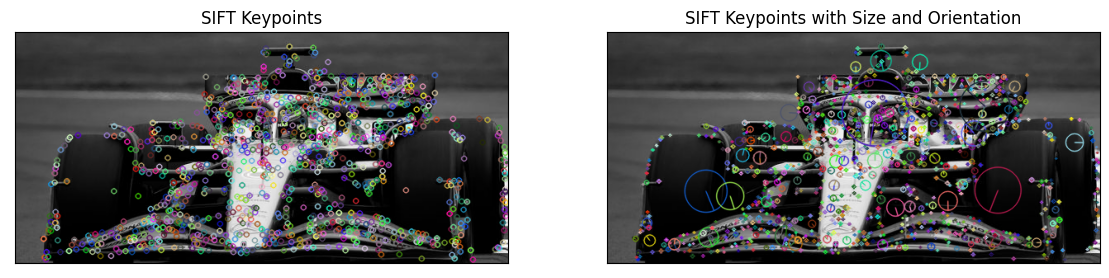

In [70]:
#Create a SIFT object
sift = cv.SIFT_create()
#Find keyppoints in the 'gray image
kp = sift.detect(img_all_contours, None)
kp, des = sift.compute(img_all_contours, kp)
print(f"The shape of the descriptor array 'des.shape' is {des.shape}.")
#Draw th4 keypoints on the image as circles

img2 = cv.drawKeypoints(ROI.copy(), kp, None)
img3 = cv.drawKeypoints(ROI.copy(), kp, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#Plot the image together with its keypoints
plt.figure(figsize = (14,8))
plt.subplot(121), plt.imshow(img2[:,:,::-1]), plt.title('SIFT Keypoints'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img3[:,:,::-1]), plt.title('SIFT Keypoints with Size and Orientation'), plt.xticks([]), plt.yticks([])

**Feature Matching**


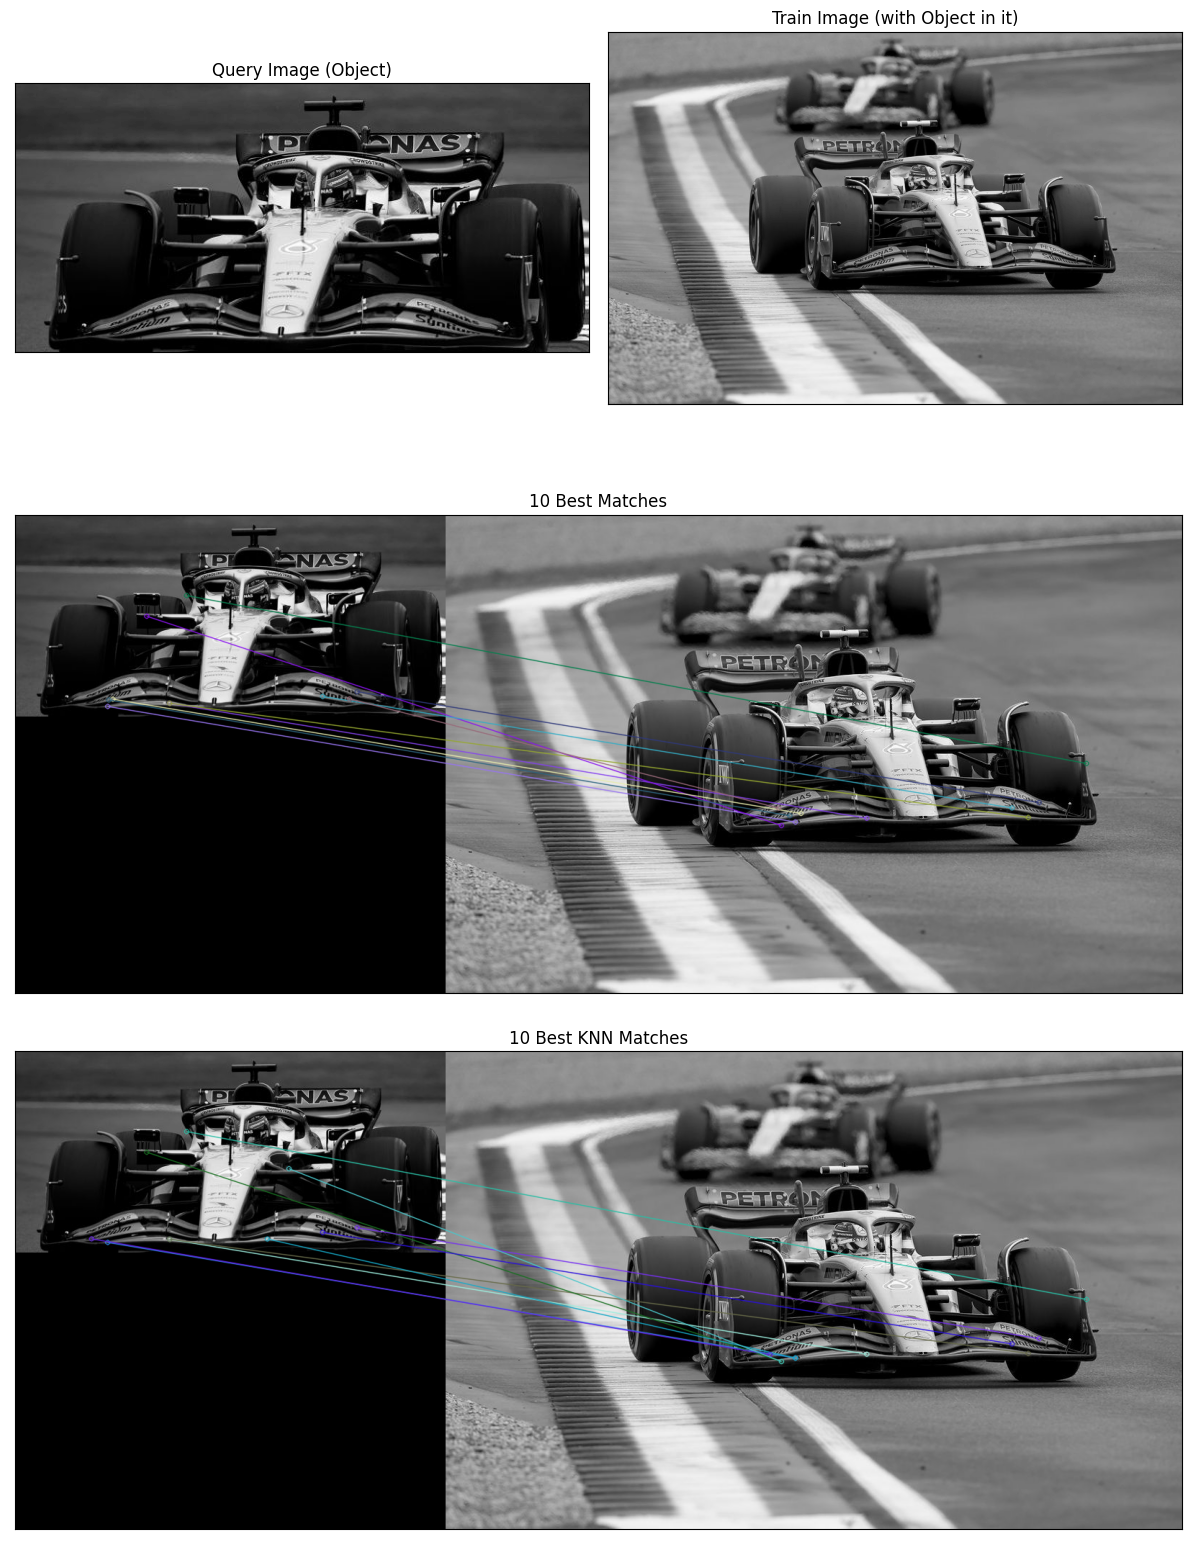

In [117]:
#Read in the query image (containing the object) in grayscale
img_query = cv.imread('../data/ROI.png', cv.IMREAD_GRAYSCALE)
#Read in the train image in gray scale
img_train = cv.imread('../data/Train_image.jpg', cv.IMREAD_GRAYSCALE)

#Create a SIFT detector object
sift = cv.SIFT_create()

#Find the SIFT keypoints and descriptors in the query and train images
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

#Create a Brute Force Matcher object
bf = cv.BFMatcher()

#Match the two descriptor sets with each other
matches = bf.match(des_query,des_train)
knn_matches = bf.knnMatch(des_query, des_train, k=2)

#Sort the matches found by the simple matching algorithm in ascending order of distance

sorted_matches = sorted(matches, key = lambda x:x.distance)

good_knn_matches = []
for m, n in knn_matches:
    if m.distance < 0.90*n.distance:
        good_knn_matches.append(m)
# Sort the matches found by the filtered KNN matching
# algorithm in ascending order of distance
sorted_good_knn_matches = sorted(good_knn_matches, key = lambda x:x.distance)

# Draw the first 10 matches found by the simple matching algorithm.
img_matches = cv.drawMatches(img_query, kp_query, img_train, kp_train, sorted_matches[:10], None,
                      flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Draw the first 10 matches found by the filtered KNN matching algorithm.
# Note: 'cv.drawMatchesKnn' expects a list of lists as matches.
sorted_good_knn_matches = [[m] for m in sorted_good_knn_matches]
img_matches_knn = cv.drawMatchesKnn(img_query, kp_query, img_train, kp_train, sorted_good_knn_matches[:10], None,
                         flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Plot the query image and train image, together with
# the stacked images with added keypoints and matches
plt.figure(figsize=(12,16))

plt.subplot(321), plt.imshow(img_query, cmap="gray"), plt.title('Query Image (Object)'), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(img_train, cmap="gray"), plt.title('Train Image (with Object in it)'), plt.xticks([]), plt.yticks([])
plt.subplot(312), plt.imshow(img_matches), plt.title('10 Best Matches'), plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(img_matches_knn), plt.title('10 Best KNN Matches'), plt.xticks([]), plt.yticks([])
plt.tight_layout(pad=1.0)
plt.show()